Google Earth Engine Landsat Images (134 images)
Task: Need to select image with similiar tide levels

In [62]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [12]:
# Download csv data
# Landsat data
landsat_dates = pd.read_csv('gee_dates.csv')
# Tide data
tide_data = pd.read_csv('2000to2024.csv')

Landsat data

In [27]:
# Clean landsat data
landsat_data = {
    'Index': range(135),
    'Date': [19990703, 19990820, 20000212, 20000228, 20000315, 20000619, 20001110, 20001126, 20001228,
             20010214, 20010318, 20010910, 20011231, 20021116, 20021218, 20030204, 20030527, 20031221,
             20040817, 20041121, 20050108, 20050430, 20060706, 20061111, 20070215, 20070826, 20071029,
             20080218, 20080305, 20080524, 20080929, 20090119, 20090714, 20090831, 20090916, 20091119,
             20091205, 20091221, 20100122, 20100207, 20100327, 20100701, 20101021, 20101122, 20101208,
             20101224, 20110226, 20110314, 20110330, 20120128, 20120519, 20121010, 20121111, 20121229,
             20130404, 20130420, 20150629, 20150715, 20151104, 20160107, 20160208, 20160327, 20170415,
             20170906, 20170922, 20171227, 20180112, 20180317, 20180621, 20181128, 20190507, 20190608,
             20190710, 20200203, 20200407, 20200626, 20200829, 20200914, 20200930, 20201101, 20210104,
             20210528, 20210901, 20211019, 20211120, 20220107, 20220524, 20220812, 20221214, 20230916,
             20220610, 20220817, 20131106, 20131122, 20131208, 20140109, 20140210, 20140602, 20140805,
             20140922, 20141008, 20150112, 20161114, 20170218, 20170306, 20170930, 20171117, 20181222,
             20190107, 20190123, 20190224, 20190328, 20190819, 20191006, 20191022, 20191209, 20201008,
             20201024, 20201211, 20201227, 20210112, 20220115, 20220216, 20220827, 20220912, 20220928,
             20221217, 20230118, 20220107, 20220819, 20220904, 20221022, 20230315, 20230907, 20231025]
}

# Create DataFrame
df = pd.DataFrame(landsat_data)
# Convert integer date to datetime
df['date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
# Extract date as string
date_strings = df['date'].dt.strftime('%Y-%m-%d')
print(date_strings)


0      1999-07-03
1      1999-08-20
2      2000-02-12
3      2000-02-28
4      2000-03-15
          ...    
130    2022-09-04
131    2022-10-22
132    2023-03-15
133    2023-09-07
134    2023-10-25
Name: date, Length: 135, dtype: object


In [41]:
landsat_df = date_strings.to_frame()
landsat_df['date'] = pd.to_datetime(landsat_df['date'])
print(landsat_df)

          date
0   1999-07-03
1   1999-08-20
2   2000-02-12
3   2000-02-28
4   2000-03-15
..         ...
130 2022-09-04
131 2022-10-22
132 2023-03-15
133 2023-09-07
134 2023-10-25

[135 rows x 1 columns]


NOAA Tide Data

In [45]:
# Cleaning tide data
df = pd.DataFrame(tide_data)
# Convert 'dates' column to datetime dtype
df['dates'] = pd.to_datetime(df['dates'])
# Splitting date and time into separate columns
df['date'] = df['dates'].dt.date
df['time'] = df['dates'].dt.time

In [46]:
# Filtering tide dataframe for only applicable tide times
filtered_df = df[(df['time'] >= pd.to_datetime('20:50:00').time()) & (df['time'] <= pd.to_datetime('21:00:00').time())]
tide_df = filtered_df[['date','time','tide']]
print(tide_df)

               date      time   tide
209      2000-01-01  20:54:00 -0.002
210      2000-01-01  21:00:00 -0.003
449      2000-01-02  20:54:00  0.012
450      2000-01-02  21:00:00  0.010
689      2000-01-03  20:54:00 -0.024
...             ...       ...    ...
2100584  2023-12-29  21:00:00  0.019
2100823  2023-12-30  20:54:00  0.072
2100824  2023-12-30  21:00:00  0.066
2101063  2023-12-31  20:54:00  0.060
2101064  2023-12-31  21:00:00  0.055

[17506 rows x 3 columns]


In [54]:
# Convert both 'dates' columns to the same data type
landsat_df['date2'] = pd.to_datetime(landsat_df['date'])
tide_df['date2'] = pd.to_datetime(tide_df['date'])
landsat_df.sort_values('date2', inplace=True)
tide_df.sort_values('date2', inplace=True)

In [55]:
merge_df = pd.merge_asof(landsat_df, tide_df, on = 'date2')
merge_df.head(10)

,date_x,date2,date_y,time,tide
0,1999-07-03,1999-07-03,NaT,NaN,NaN
1,1999-08-20,1999-08-20,NaT,NaN,NaN
2,2000-02-12,2000-02-12,2000-02-12,20:54:00,-0.193
3,2000-02-28,2000-02-28,2000-02-28,21:00:00,-0.164
4,2000-03-15,2000-03-15,2000-03-15,21:00:00,-0.060
5,2000-06-19,2000-06-19,2000-06-19,20:54:00,-0.342
6,2000-11-10,2000-11-10,2000-11-10,21:00:00,0.087
7,2000-11-26,2000-11-26,2000-11-26,21:00:00,-0.034
8,2000-12-28,2000-12-28,2000-12-28,21:00:00,0.006
9,2001-02-14,2001-02-14,2001-02-14,20:54:00,-0.121


In [57]:
print(merge_df)

        date_x      date2     date_y      time   tide
0   1999-07-03 1999-07-03        NaT       NaN    NaN
1   1999-08-20 1999-08-20        NaT       NaN    NaN
2   2000-02-12 2000-02-12 2000-02-12  20:54:00 -0.193
3   2000-02-28 2000-02-28 2000-02-28  21:00:00 -0.164
4   2000-03-15 2000-03-15 2000-03-15  21:00:00 -0.060
..         ...        ...        ...       ...    ...
130 2023-01-18 2023-01-18 2023-01-18  21:00:00  0.043
131 2023-03-15 2023-03-15 2023-03-15  21:00:00 -0.218
132 2023-09-07 2023-09-07 2023-09-07  21:00:00  0.450
133 2023-09-16 2023-09-16 2023-09-16  21:00:00  0.062
134 2023-10-25 2023-10-25 2023-10-25  21:00:00  0.455

[135 rows x 5 columns]


In [59]:
landsat_tide_df = merge_df[['date_x','time','tide']]
print(landsat_tide_df)

        date_x      time   tide
0   1999-07-03       NaN    NaN
1   1999-08-20       NaN    NaN
2   2000-02-12  20:54:00 -0.193
3   2000-02-28  21:00:00 -0.164
4   2000-03-15  21:00:00 -0.060
..         ...       ...    ...
130 2023-01-18  21:00:00  0.043
131 2023-03-15  21:00:00 -0.218
132 2023-09-07  21:00:00  0.450
133 2023-09-16  21:00:00  0.062
134 2023-10-25  21:00:00  0.455

[135 rows x 3 columns]


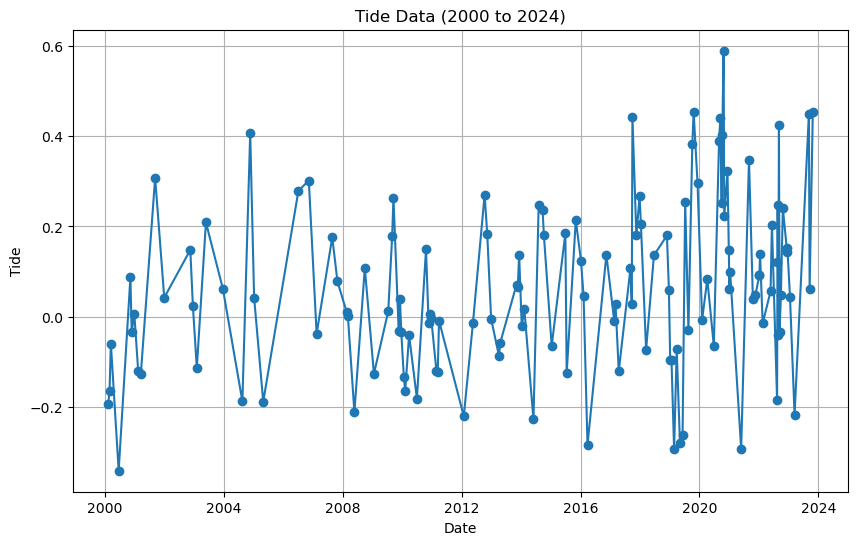

In [63]:
plt.figure(figsize=(10, 6))
plt.plot(landsat_tide_df['date_x'], merge_df['tide'], marker='o', linestyle='-')
plt.title('Tide Data (2000 to 2024)')
plt.xlabel('Date')
plt.ylabel('Tide')
plt.grid(True)
plt.show()